#Import Libraries

In [65]:
import numpy as np
import sklearn 
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sns
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as KNN

#Load Breast Cancer Dataset

In [2]:
br=load_breast_cancer()
data=np.c_[br.data,br.target]
columns=np.append(br.feature_names, ["target"])
df=pd.DataFrame(data, columns=columns)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


Benign tumour counts:357
Malignant tumour counts:212


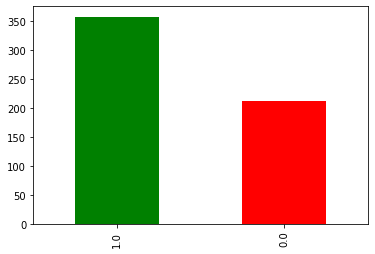

In [12]:
df['target'].value_counts().plot(kind='bar',y=['benign','malignant'],color=['green','red'])
v=df['target'].value_counts().to_dict()
print("Benign tumour counts:"+str(v[1.0]))
print("Malignant tumour counts:"+str(v[0.0]))

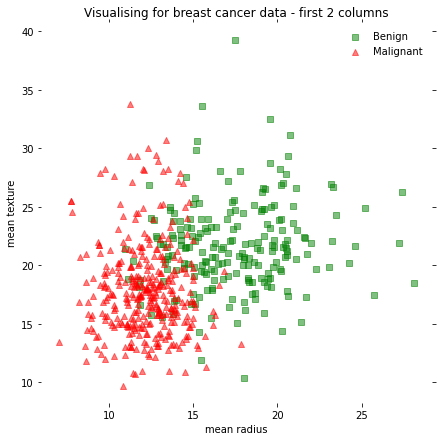

In [26]:
label_dict = {0:'Benign', 1: 'Malignant', 2: 'Class 3', 3:'Class 4'}
plt.figure(figsize=(7,7))

def plot_scikit_lda(X,y, title):
      ax = plt.subplot(111)
      for label,marker,color in zip(
          [i for i in range(2)],('s','^','o','*'),('green','red','blue','black')):

          plt.scatter(x=X[:,0][y == label],
                      y=X[:,1][y == label],
                      marker=marker,
                      color=color,
                      alpha=0.5,
                      label=label_dict[label])

      plt.xlabel(df.columns[0])
      plt.ylabel(df.columns[1])

      leg = plt.legend(loc='upper right', fancybox=True)
      leg.get_frame().set_alpha(0)
      plt.title(title)

      # hide axis ticks
      plt.tick_params(axis="both", which="both", bottom="off", top="off",  
              labelbottom="on", left="off", right="off", labelleft="on")

      # remove axis spines
      ax.spines["top"].set_visible(False)  
      ax.spines["right"].set_visible(False)
      ax.spines["bottom"].set_visible(False)
      ax.spines["left"].set_visible(False)    
      plt.tight_layout
      plt.show()

plot_scikit_lda(np.array(df.iloc[:,:2]), np.array(df.iloc[:,-1]), title='Visualising for breast cancer data - first 2 columns')

In [31]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:df.shape[1]-1],df.iloc[:,-1],random_state=0)

#Logistic Regression without penalty

In [59]:
lr1=LR(max_iter=10000,penalty='none')
l1=lr1.fit(x_train,y_train)
y_pred1=l1.predict(x_test)
print('Accuracy:',l1.score(x_test,y_test)*100)
print(classification_report(y_true=y_test,y_pred=y_pred))

Accuracy: 95.1048951048951
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95        53
         1.0       0.99      0.94      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



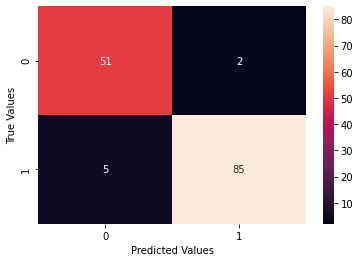

In [60]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

#Logistic Regression with L2 or ridge penalty

In [61]:
lr2=LR(max_iter=10000,penalty='l2')
l2=lr2.fit(x_train,y_train)
y_pred2=l2.predict(x_test)
print('Accuracy:',l2.score(x_test,y_test)*100)
print(classification_report(y_true=y_test,y_pred=y_pred))

Accuracy: 95.1048951048951
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95        53
         1.0       0.99      0.94      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



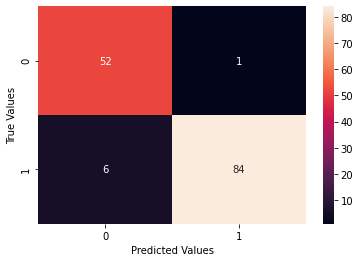

In [62]:
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

#Logistic Regression with L1 or lasso penalty

In [63]:
lr3=LR(max_iter=1000,penalty='l1',solver='liblinear')
l3=lr3.fit(x_train,y_train)
y_pred3=l3.predict(x_test)
print('Accuracy:',l3.score(x_test,y_test)*100)
print(classification_report(y_true=y_test,y_pred=y_pred))

Accuracy: 95.8041958041958
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95        53
         1.0       0.99      0.94      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



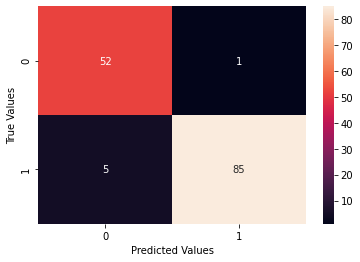

In [64]:
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

#KNN Classifier

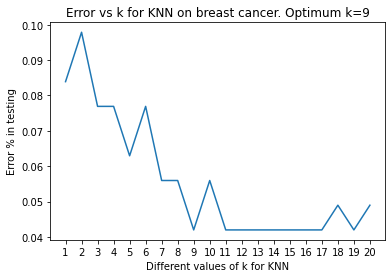

In [94]:
errs=[]
for i in range(1,21):
  k=KNN(n_neighbors=i)
  kn=k.fit(x_train,y_train)
  acc=kn.score(x_test,y_test)
  errs.append(1-acc)

plt.plot([i for i in range(1,21)],errs)
plt.xlabel('Different values of k for KNN')
plt.xticks([i for i in range(1,21)])
plt.ylabel('Error % in testing')
plt.title('Error vs k for KNN on breast cancer. Optimum k='+str(errs.index(np.min(errs))+1))
plt.show()
min_k=errs.index(np.min(errs))

In [98]:
k=KNN(n_neighbors=min_k+1)
kn=k.fit(x_train,y_train)
k_pred=kn.predict(x_test)
print("Accuracy of KNN clasifier")
print(classification_report(y_true=y_test,y_pred=k_pred))

Accuracy of KNN clasifier
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        53
         1.0       0.96      0.98      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



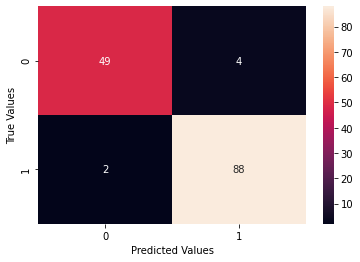

In [99]:
sns.heatmap(confusion_matrix(y_test,k_pred),annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()